# Lead Score - Case Study

### Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying 
customers. The company require us to build a model wherein you need to assign a lead score to each of the leads such that 
the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower 
conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals and Objectives

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
### Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Supress the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### 1. Loading the Data

In [3]:
#Reading data set leads.csv

df_leads = pd.read_csv('Leads.csv')
df_leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2. Inspecting the DataFrame

In [4]:
#Checking the dataype and count of null values

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Checking the shape of the dataframe

df_leads.shape

(9240, 37)

**Observation**

    The DataFrame has 9240 Rows and 37 Columns

In [6]:
#Checking the numerical columns stats of the DataFrame

df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Checking the categorical columns stats of the DataFrame

df_leads.describe(include='object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,...,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,...,5,1,1,6,7,3,3,1,2,16
top,80448da8-326b-49c7-a617-0bbcde5807fe,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,...,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,...,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


In [8]:
#Checking for Duplicate records in the DataFrame

sum(df_leads.duplicated(subset='Prospect ID'))==0

True

**Observation**

    No Duplicate record Found

### 3. Cleaning the DataFrame

First thing First, lets check those columns where no option has been selected and the field is having a 'Select' value by default which is as good as having a Null Value

In [9]:
#Checking the Null values count before replacing the 'Select'

df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#Replacing the 'Select' option with null.

df_leads = df_leads.replace('Select',np.nan)

In [11]:
#Checking the Null Value count after replacing the 'Select' with Null

df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

**Observation**

    We can clearly see the increase in the null values count in the DataFrame after replacing 'Select' with nan.

In [12]:
#Checking the Percentage of Null Values columns in the DataFrame

round(df_leads.isnull().sum()/len(df_leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

**Dropping those columns which are having more than 40% of Null Values**

In [13]:
#Shape of the DataFrame before dropping the columns

df_leads.shape

(9240, 37)

In [14]:
#Dropping the columns

df_leads = df_leads.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [15]:
#Shape of the DataFrame after dropping the columns

df_leads.shape

(9240, 30)

**Checking the columns with one unique value since it won't affect our analysis. Columns with one unique or one extremely high values are skewed columns which can be removed.**

In [16]:
#Checking Unique value/skewed columns

df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [17]:
#Shape before dropping

df_leads.shape

(9240, 30)

In [18]:
#Dropping unique valued columns

df_leads = df_leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)

In [19]:
#Shape after dropping

df_leads.shape

(9240, 25)

In [20]:
#Checking the Percentage of Null Values again after dropping columns

round(df_leads.isnull().sum()/len(df_leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

**Imputing values for columns which are having less than 40% of Null Values**

In [21]:
#Checking City Column which is having 39.71% of null values

df_leads['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

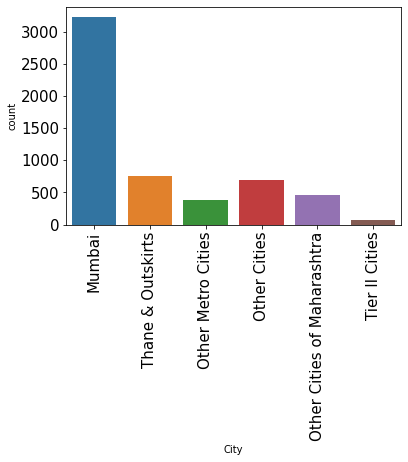

In [22]:
#Plotting the counplot to check the count of each unique value

sns.countplot(df_leads['City'])
plt.xticks(rotation = 90, fontsize=15)
plt.yticks( fontsize=15)
plt.show()

In [23]:
#Checking the count of individual unique values before imputing

df_leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
#Imputing the missing values with Mumbai as more than 60% data is Mumbai only.

df_leads['City'] = df_leads['City'].replace(np.nan,'Mumbai')

In [25]:
#Checking the count of individual unique values after imputing

df_leads['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [26]:
#Checking the Percentage of Null Values again after imputing City column

round(df_leads.isnull().sum()/len(df_leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [32]:
#Checking the Percentage of Null Values again after imputing Tags column

round(df_leads.isnull().sum()/len(df_leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

**There are few columns which are Null. The most probable reason might be because people didn't wanted to share that. So we cannot impute them or drop them**

In [33]:
#lets add a separate value for them as not provided.

df_leads['Specialization'] = df_leads['Specialization'].fillna('Not Provided')
df_leads['Country'] = df_leads['Country'].fillna('Not Provided')
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].fillna('Not Provided')
df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].fillna('Not Provided')

In [34]:
#Checking the info of the DataFrame

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [35]:
#Checking the Percentage of Null Values

round(df_leads.isnull().sum()/len(df_leads)*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [36]:
#Checking Specialization Column.

df_leads['Country'].describe()

count      9240
unique       39
top       India
freq       6492
Name: Country, dtype: object

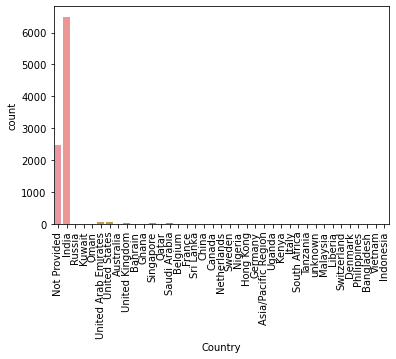

In [37]:
#Plotting the counplot to check the count of each unique value

sns.countplot(df_leads['Country'])
plt.xticks(rotation = 90,fontsize=10)
plt.show()

In [38]:
#Checking the count of individual unique values.

df_leads['Country'].value_counts()

India                   6492
Not Provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Kuwait                     4
Canada                     4
Germany                    4
South Africa               4
Sweden                     3
Belgium                    2
Philippines                2
China                      2
Bangladesh                 2
Asia/Pacific Region        2
Ghana                      2
Italy                      2
Uganda                     2
Netherlands                2
Russia                     1
Tanzania                   1
Kenya                      1
Malaysia                   1
Indonesia                  1
Denmark       

**We can see there are unique and very small/negligible values present. We can categorized them into one specific category.**

In [39]:
#Finding count of applicants as the provided country data

def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Provided":
        category = "Not Provided"
    else:
        category = "Outside India"
    return category

df_leads['Country'] = df_leads.apply(lambda x:slots(x['Country']), axis = 1)
df_leads['Country'].value_counts()

India            6492
Not Provided     2461
Outside India     287
Name: Country, dtype: int64

In [40]:
#Re-checking the percentage of Null values present.

round(df_leads.isnull().sum()/len(df_leads)*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [41]:
#Checking Specialization Column

df_leads['Specialization'].describe()

count             9240
unique              19
top       Not Provided
freq              3380
Name: Specialization, dtype: object

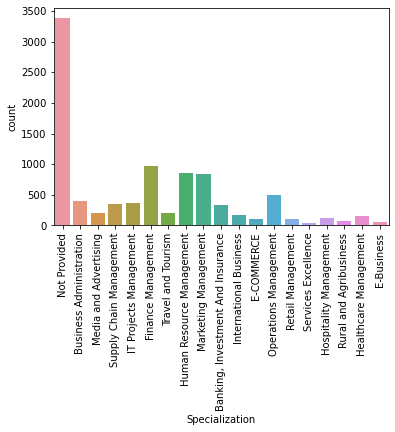

In [42]:
#Plotting the counplot to check the count of each unique value

sns.countplot(df_leads['Specialization'])
plt.xticks(rotation = 90)
plt.show()

In [43]:
#Checking the count of individual unique values

df_leads['Specialization'].value_counts()

Not Provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [44]:
#Checking 'What matters most to you in choosing a course' column

df_leads['What matters most to you in choosing a course'].describe()

count                        9240
unique                          4
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

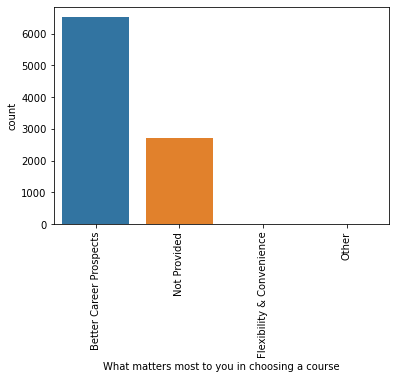

In [45]:
#Plotting the counplot to check the count of each unique value

sns.countplot(df_leads['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
plt.show()

In [46]:
#Checking the count of individual unique values

df_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Not Provided                 2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [47]:
#Checking 'What is your current occupation' column

df_leads['What is your current occupation'].describe()

count           9240
unique             7
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

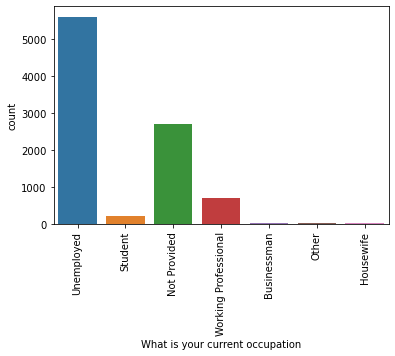

In [48]:
#Plotting the counplot to check the count of each unique value

sns.countplot(df_leads['What is your current occupation'])
plt.xticks(rotation = 90)
plt.show()

In [49]:
#Checking the count of individual unique values

df_leads['What is your current occupation'].value_counts()

Unemployed              5600
Not Provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [50]:
#Re-checking the percentage of Null values present.

round(df_leads.isnull().sum()/len(df_leads)*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [51]:
#Checking shape before dropping

df_leads.shape

(9240, 25)

In [52]:
#Rest missing values are under 2%, so we can drop these rows.

df_leads.dropna(inplace=True)

In [53]:
#Dropping Columns which are of no use in our Analysis.

df_leads = df_leads.drop(['Prospect ID','Lead Number'],axis=1)

In [54]:
#Checking shape after dropping

df_leads.shape

(9074, 23)

In [55]:
#Now we can see that there are no null values present.

round(df_leads.isnull().sum()/len(df_leads)*100,2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [56]:
#Checking info of the dataframe

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [57]:
df_leads.to_csv('Leads Cleaned')

### 4. Exploratory Data Analysis

### 4.1 Univariate Analysis

**Categorical Variables**

In [58]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

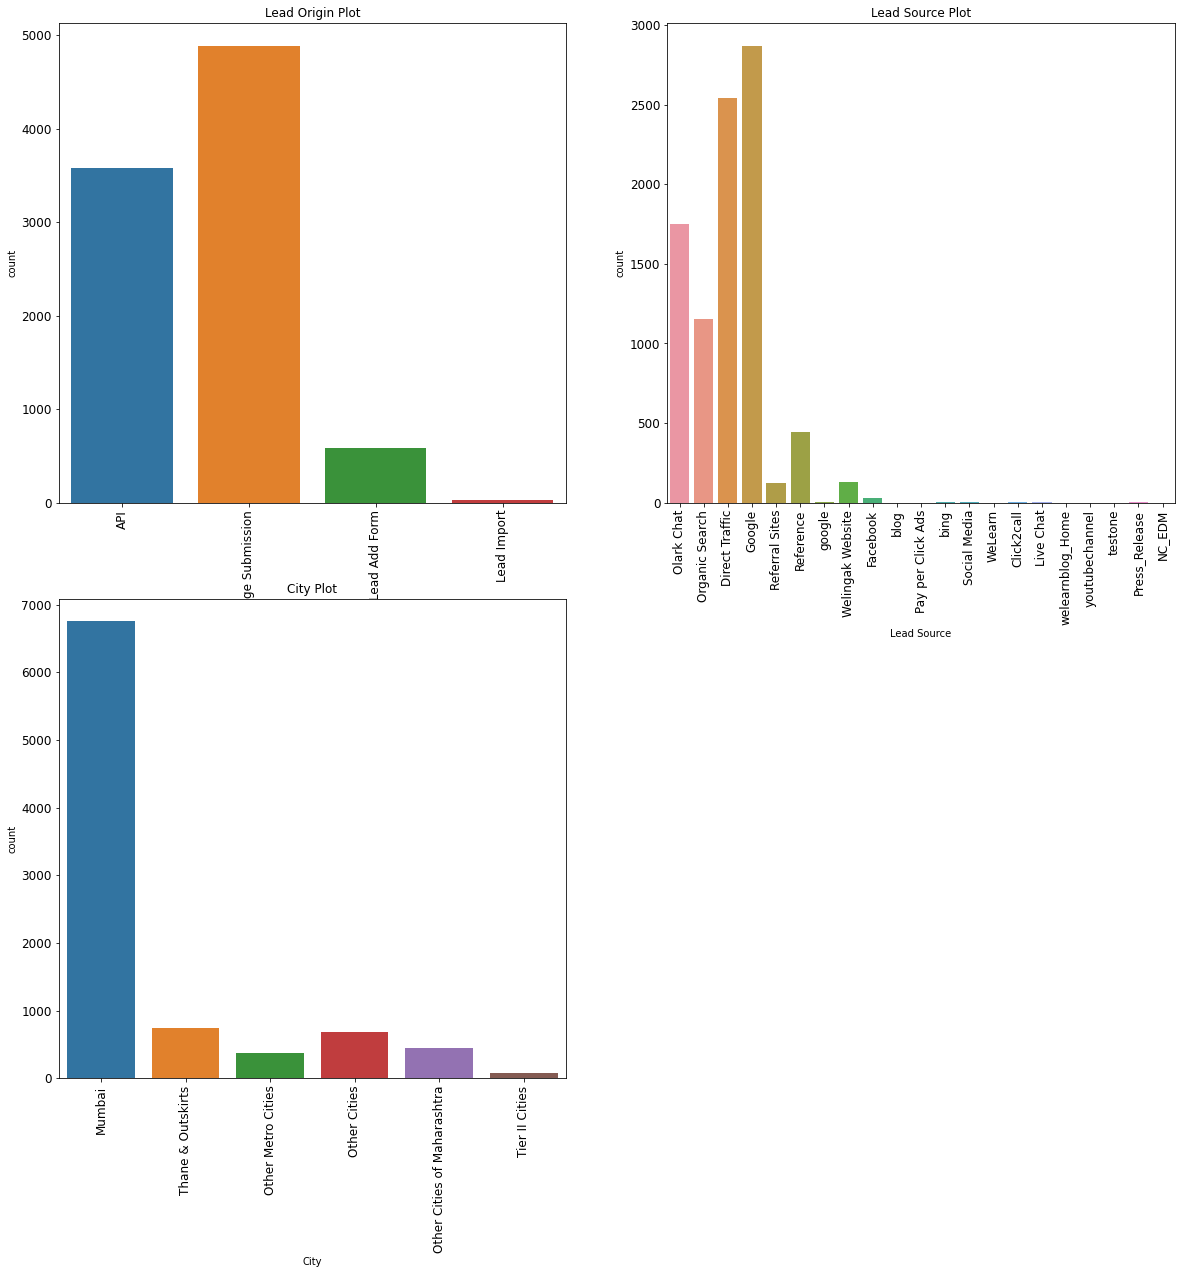

In [59]:
#plotting graph non-numeric data

plt.figure(figsize=(20,30))

plt.subplot(3,2,1)
sns.countplot(df_leads['Lead Origin'])
plt.title('Lead Origin Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.subplot(3,2,2)
sns.countplot(df_leads['Lead Source'])
plt.title('Lead Source Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)


plt.subplot(3,2,3)
sns.countplot(df_leads['City'])
plt.title('City Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.show()

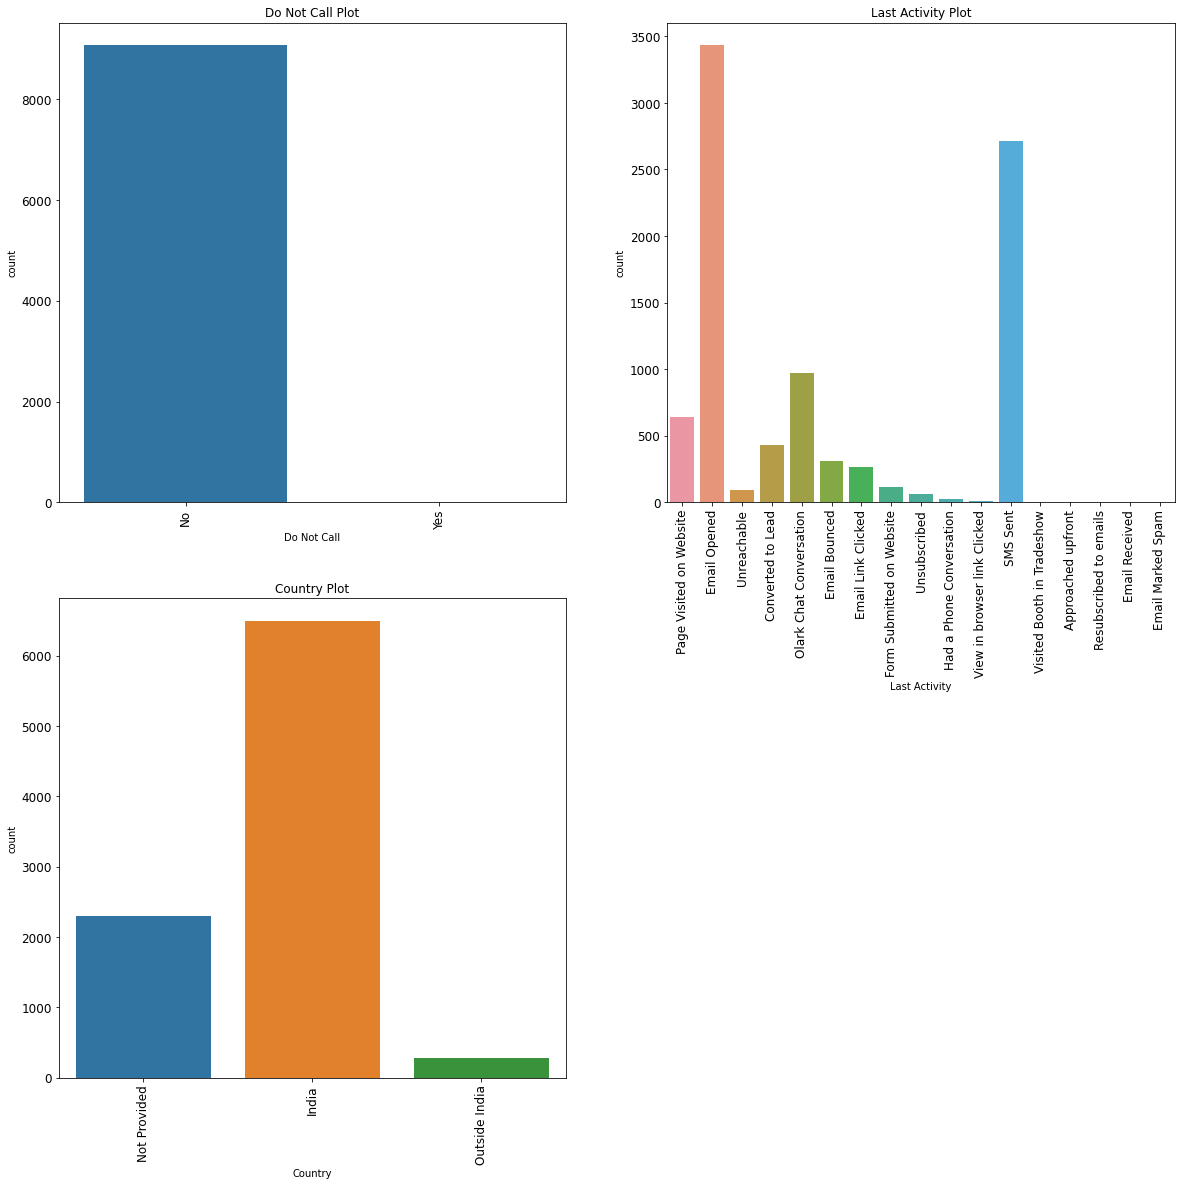

In [60]:
#Non-numeric bar plot

plt.figure(figsize=(20,30))

plt.subplot(3,2,1)
sns.countplot(df_leads['Do Not Call'])
plt.title('Do Not Call Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)


plt.subplot(3,2,2)
sns.countplot(df_leads['Last Activity'])
plt.title('Last Activity Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.subplot(3,2,3)
sns.countplot(df_leads['Country'])
plt.title('Country Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.show()

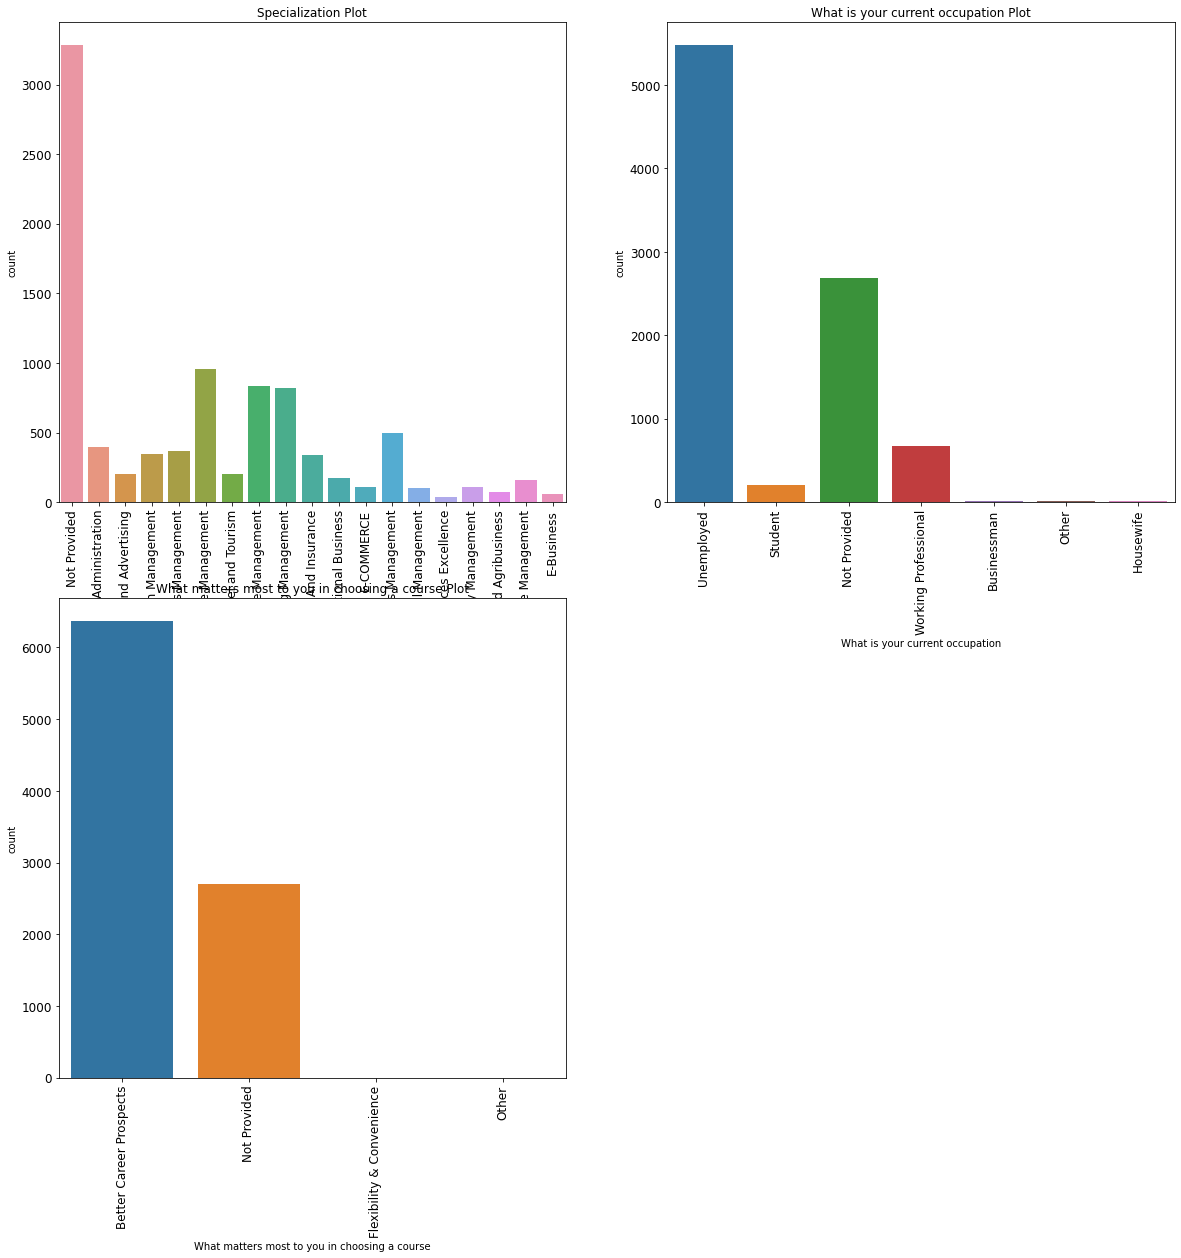

In [61]:
# Bar plot for What matters most to you in choosing a course, What is your current occupation and Specialization

plt.figure(figsize=(20,30))

plt.subplot(3,2,1)
sns.countplot(df_leads['Specialization'])
plt.title('Specialization Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.subplot(3,2,2)
sns.countplot(df_leads['What is your current occupation'])
plt.title('What is your current occupation Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.subplot(3,2,3)
sns.countplot(df_leads['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.show()

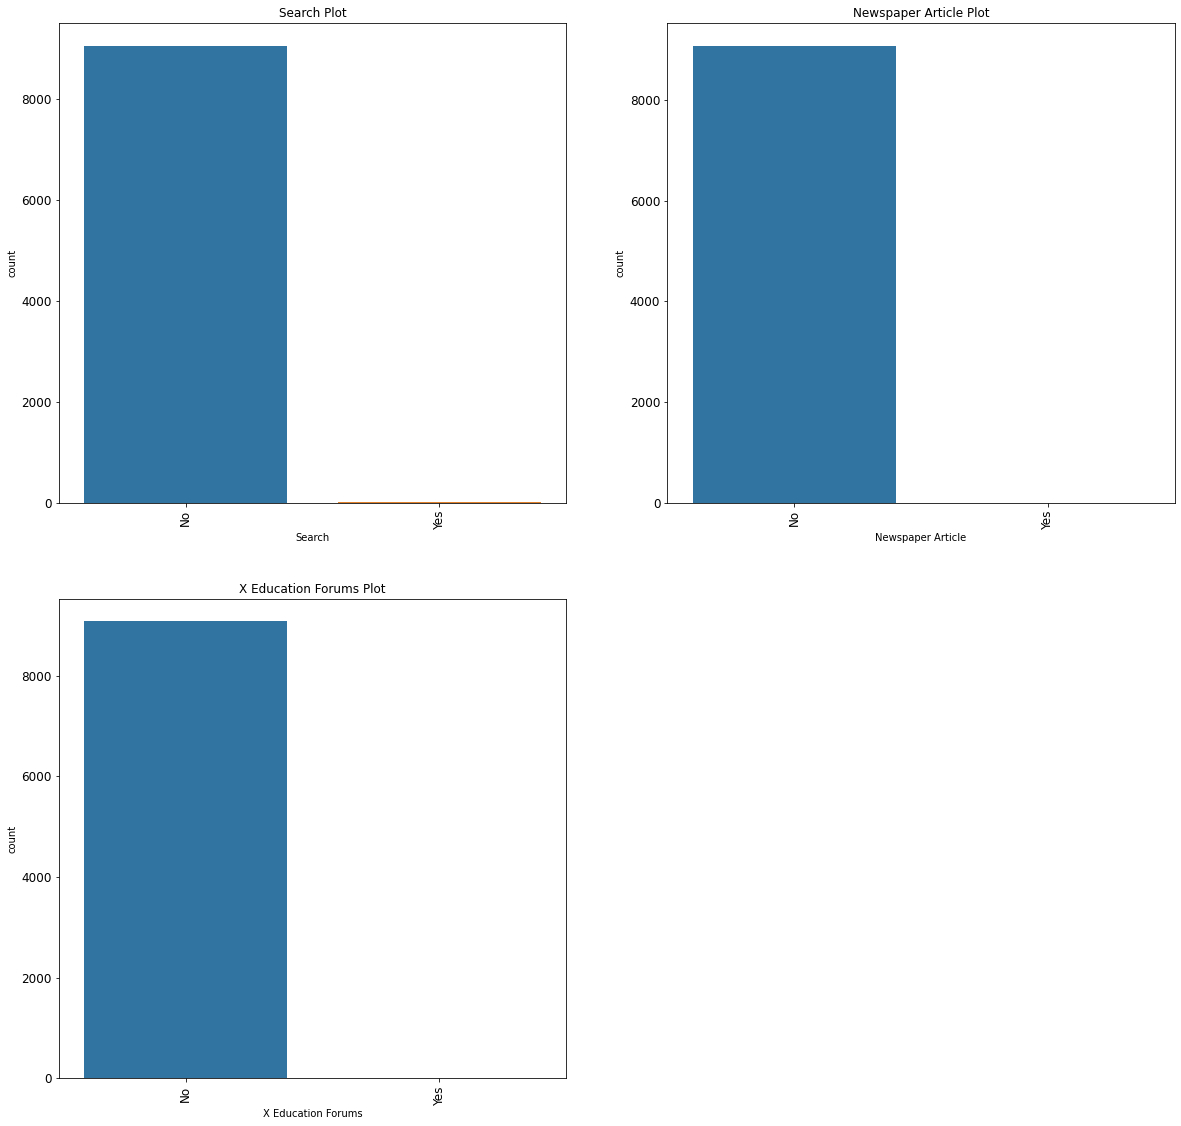

In [62]:
# Bar plot for Search, Newspaper Article and X Education Forums

plt.figure(figsize=(20,30))

plt.subplot(3,2,1)
sns.countplot(df_leads['Search'])
plt.title('Search Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.subplot(3,2,2)
sns.countplot(df_leads['Newspaper Article'])
plt.title('Newspaper Article Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.subplot(3,2,3)
sns.countplot(df_leads['X Education Forums'])
plt.title('X Education Forums Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.show()

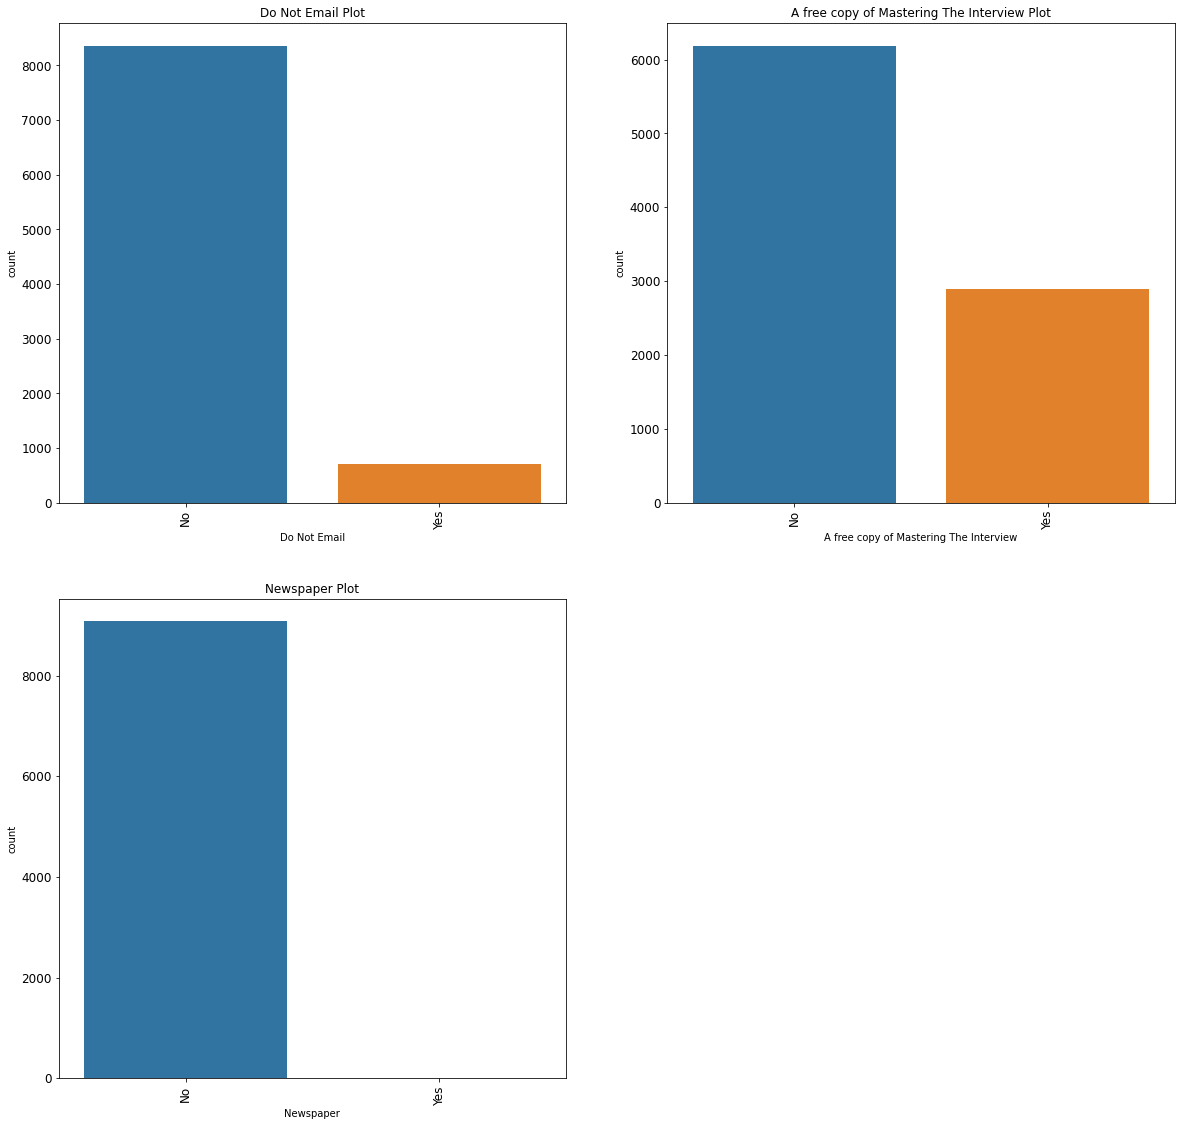

In [63]:
# Bar plot for  Do Not Email , A free copy of Mastering The Interview and Newspaper

plt.figure(figsize=(20,30))

plt.subplot(3,2,1)
sns.countplot(df_leads['Do Not Email'])
plt.title('Do Not Email Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.subplot(3,2,2)
sns.countplot(df_leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.subplot(3,2,3)
sns.countplot(df_leads['Newspaper'])
plt.title('Newspaper Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.show()

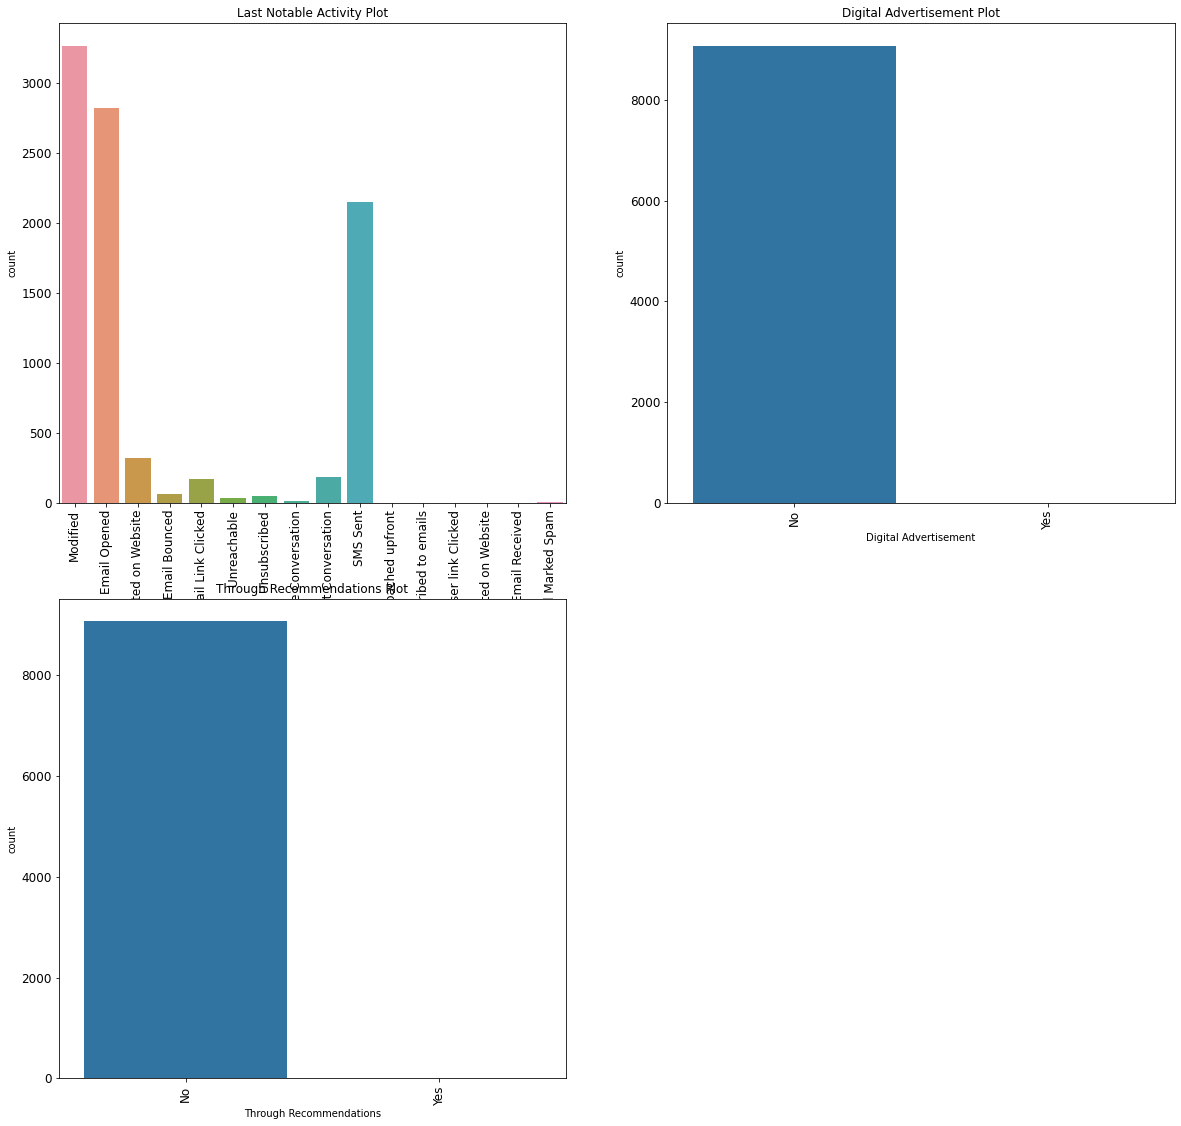

In [64]:
#Bar plot for Last Notable Activity, Digital Advertisement and Through Recommendations

plt.figure(figsize=(20,30))

#plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=9.0)

plt.subplot(3,2,1)
sns.countplot(df_leads['Last Notable Activity'])
plt.title('Last Notable Activity Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.subplot(3,2,2)
sns.countplot(df_leads['Digital Advertisement'])
plt.title('Digital Advertisement Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.subplot(3,2,3)
sns.countplot(df_leads['Through Recommendations'])
plt.title('Through Recommendations Plot')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.show()

**Numeric Variables**

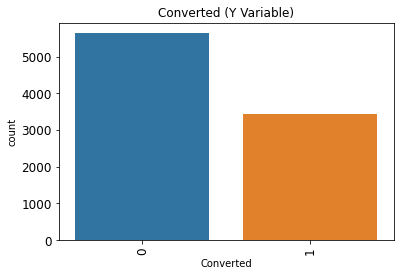

In [66]:
#Bar plot for numeric variable

sns.countplot(df_leads['Converted'])
plt.title('Converted (Y Variable)')
plt.yticks(fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)

plt.show()

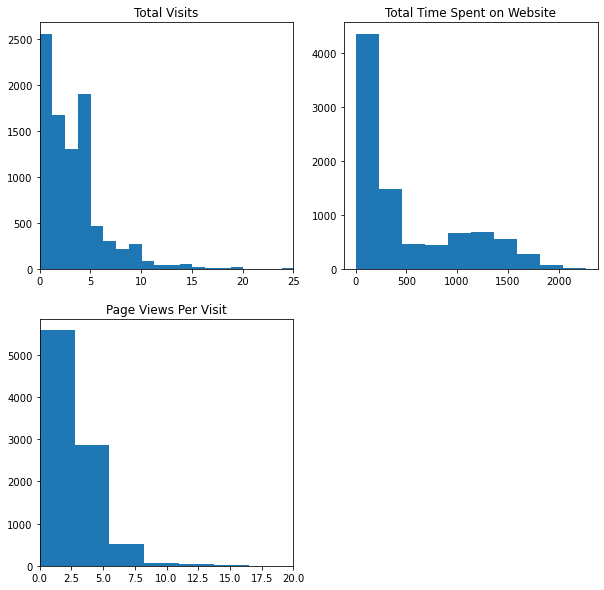

In [67]:
#Bar plot for TotalVisits , Total Time Spent on Website and Page Views Per Visit

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 4.2 Relating all the categorical variables to Converted (Target Variable)

In [68]:
#Checking the Conversion rate of the Leads

converted = round(df_leads['Converted'].sum()/len(df_leads['Converted'])*100,2)
converted

37.86

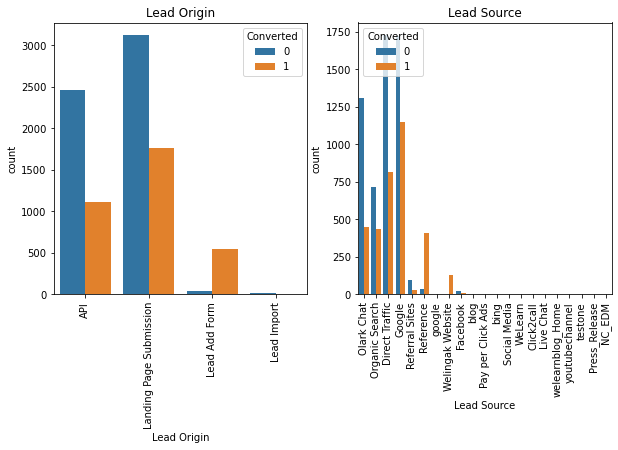

In [69]:
#Lead Origin and Lead Source in terms of converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

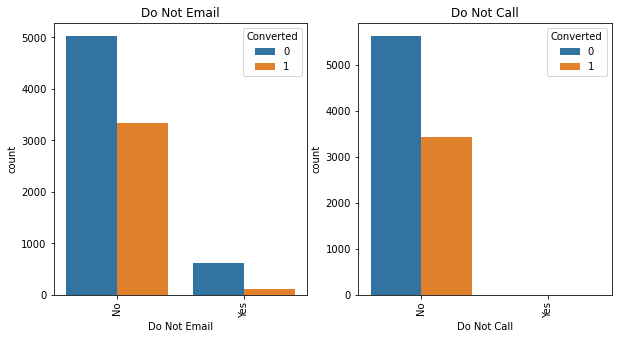

In [70]:
#Do Not Email and Do Not Call in terms of converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

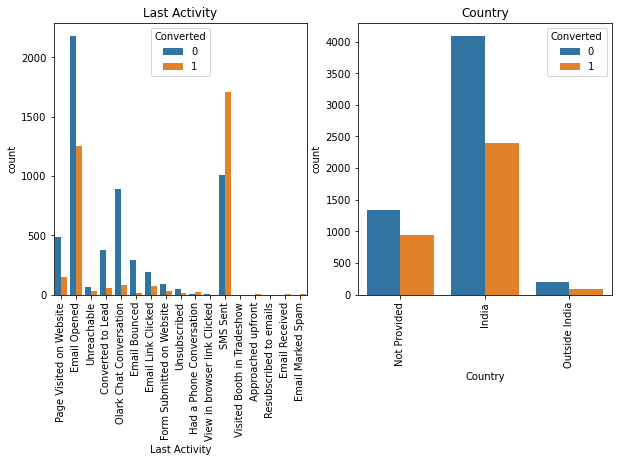

In [71]:
#Last Activity and Country in terms of converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

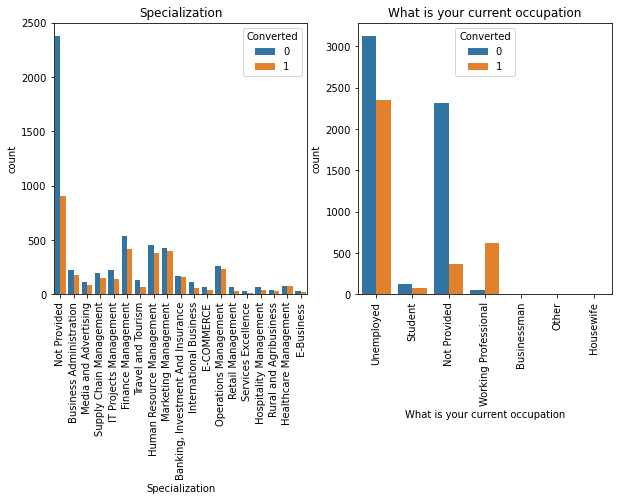

In [72]:
#Specialization and What is your current occupation in terms of converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

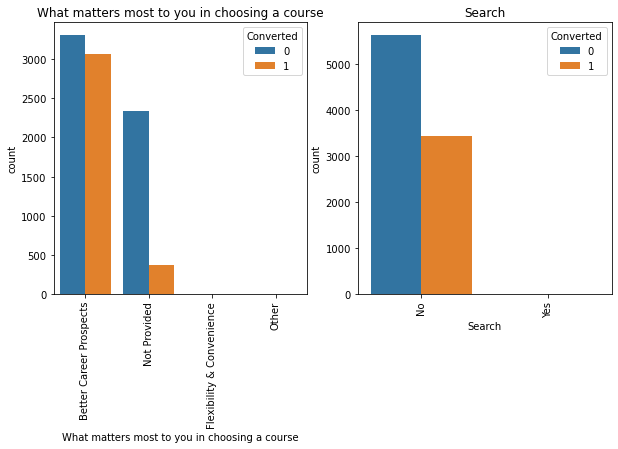

In [73]:
#What matters most to you in choosing a course and Search in terms of converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

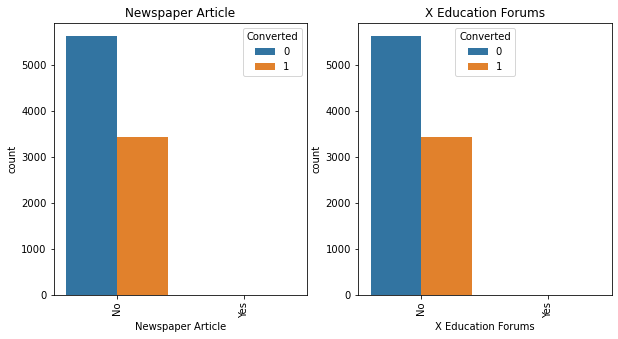

In [74]:
#Newspaper Article and X Education Forums in terms of converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

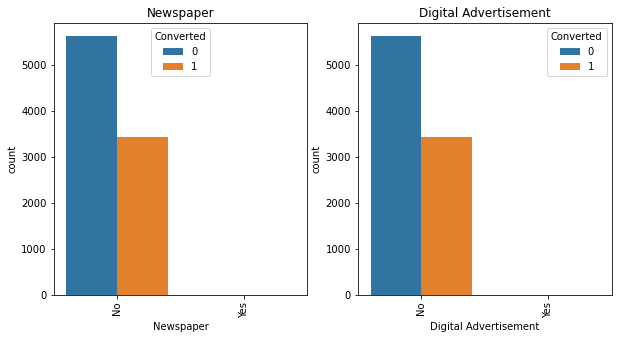

In [75]:
# Newspaper and Digital Advertisement in terms of converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

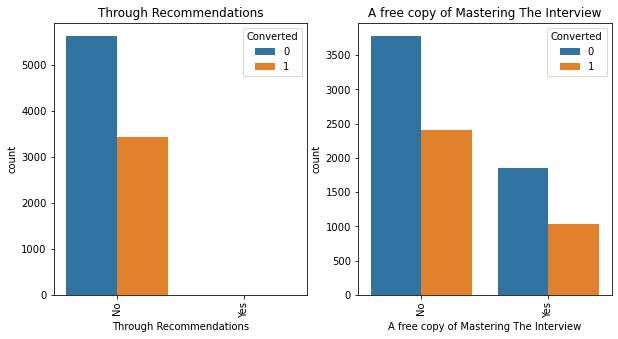

In [76]:
# Through Recommendations and A free copy of Mastering The Interview in terms of converted

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

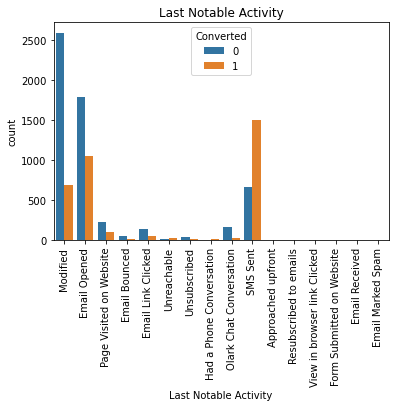

In [77]:
#last Notable activity

sns.countplot(x='Last Notable Activity', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

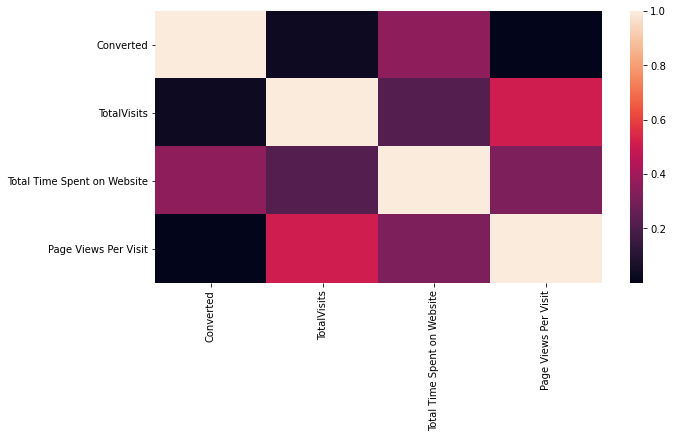

In [78]:
# To check the correlation among numerical varibles

plt.figure(figsize=(10,5))
sns.heatmap(df_leads.corr())
plt.show()

## 5. Dummy Variables

In [79]:
#checking the onject variables

df_leads.loc[:, df_leads.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [80]:
# Creating dummy variables using the 'get_dummies'

dummy = pd.get_dummies(df_leads[['Lead Origin', 'Lead Source','Last Activity','Specialization','What is your current occupation','Last Notable Activity','Do Not Email']], drop_first=True)

# Add the results to the master dataframe
df_leads_dum = pd.concat([df_leads, dummy], axis=1)
df_leads_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Not Provided,...,0,1,0,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,0,1,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Outside India,...,0,0,0,0,0,0,0,0,0,1
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,0,0,0,0,0,1,0,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,0,0,0,0,0,1,0,0,0,1
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,0,0,0,0,0,1,0,0,0,0


In [81]:
df_leads_dum.shape

(9074, 102)

In [82]:
#Removing the original column as we have created dummies for below categories and removing the objects datatype columns:

df_duplicate=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']


df_leads_dum=df_leads_dum.drop(df_duplicate,1)

df_leads_dum.shape

(9074, 83)

## 6.Data Preparation

### 6.1 Test-Train Split

In [83]:
# Import the required library

from sklearn.model_selection import train_test_split

In [84]:
# Separating target varaible from dependent variable

y=df_leads_dum['Converted']     # putting target varaible 'Converted' to a new series 'y'

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
# Putting dependent variable in a new dataset called 'X'

X=df_leads_dum.drop('Converted',1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [86]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 6.2 Feature Standardization

In [87]:
# Importing library MinMaxscaler

from sklearn.preprocessing import MinMaxScaler

In [88]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### 6.3 Correlation of the dataset

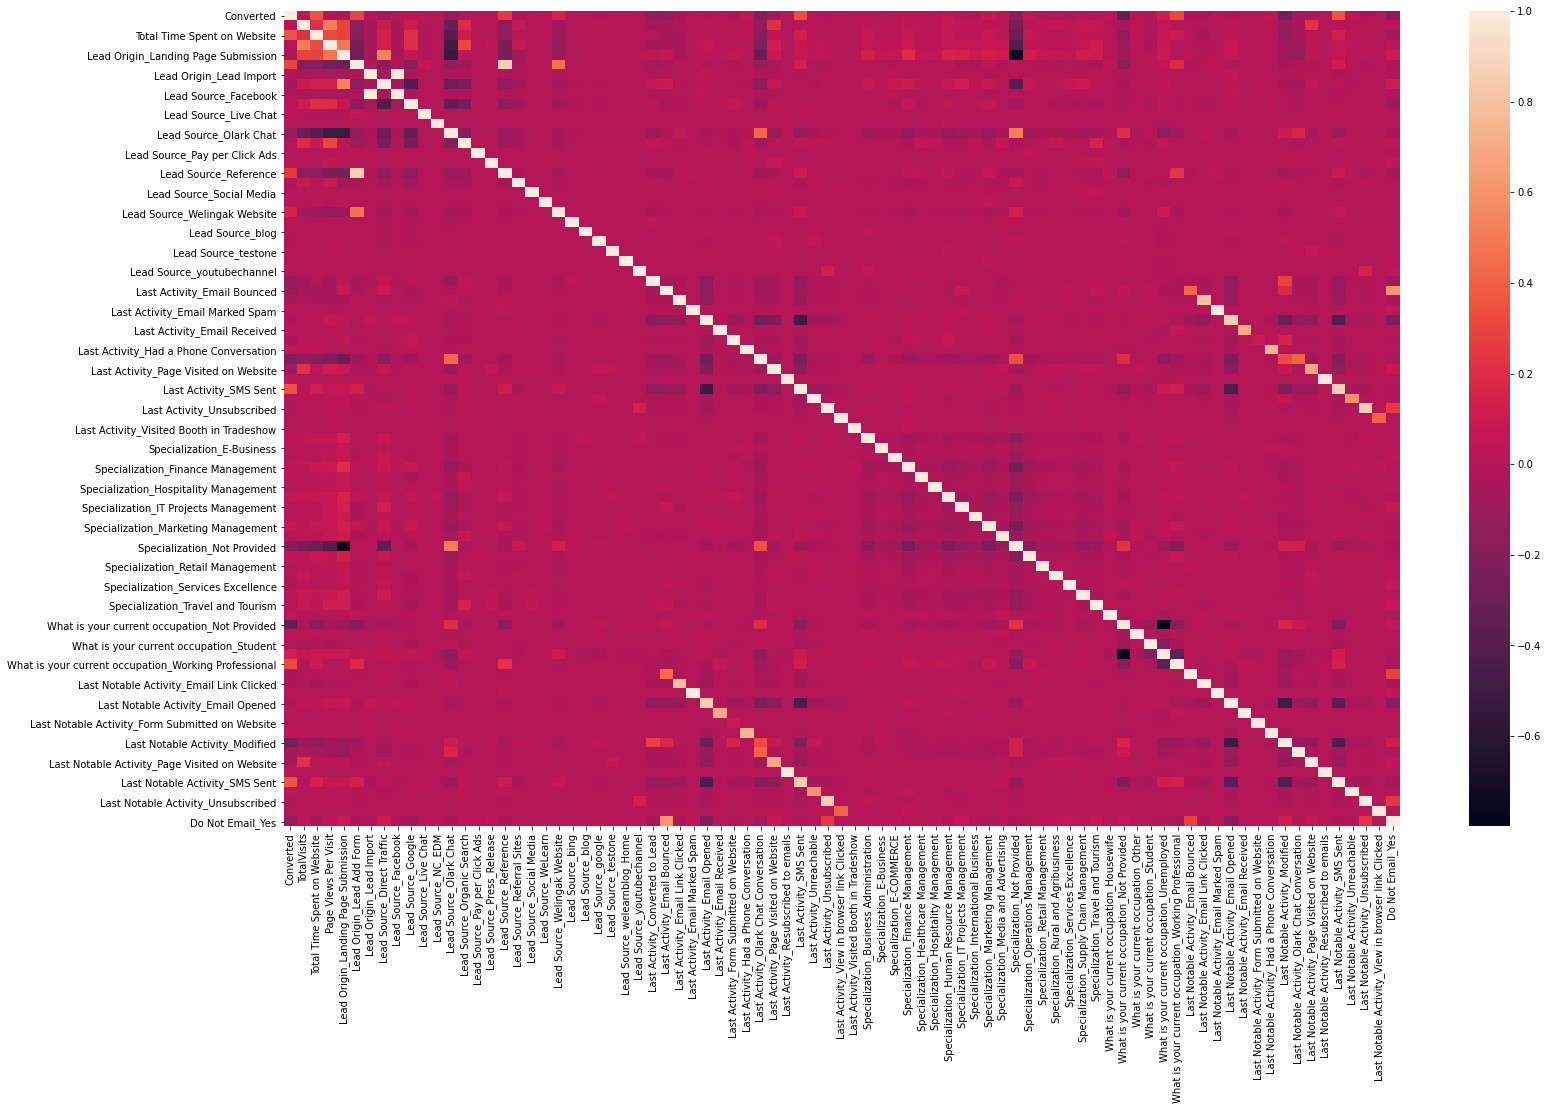

In [89]:
# Looking at the correlation table

plt.figure(figsize = (25,15))

sns.heatmap(df_leads_dum.corr())

plt.show()

By seeing the heat map, we can say that the feature - Total visits and Total time spend on website are highly correlated.

## 7. Running FRE

In [90]:
# Importing 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


# Importing RFE
from sklearn.feature_selection import RFE

In [91]:
 # running RFE with 18 variables 

rfe = RFE(logreg, 18)            
rfe = rfe.fit(X_train, y_train)

In [92]:
# Features that have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 57),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 31),
 ('Lead Source_WeLearn', False, 65),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 62),
 ('Lead Source_blog', False, 37),
 ('Lead Source_google', False, 34),
 ('Lead Source_testone', False, 33),
 ('Lead Source_welearnblog_Home', False, 45),
 ('L

In [93]:
# Putting all the columns selected by RFE in the variable 'col_rfe'

col_rfe = X_train.columns[rfe.support_]

In [94]:
# Importing statsmodels

import statsmodels.api as sm

# Importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# Selecting columns selected by RFE

X_train = X_train[col_rfe]

## 8. Model Building¶

### Model 1

In [96]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary and Making a VIF dataframe for all the variables present

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.3
Date:                Mon, 14 Jun 2021   Deviance:                       5068.6
Time:                        01:10:46   Pearson chi2:                 6.28e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 2

In [97]:
#dropping column What is your current occupation_Housewife as it's highly insignificant and run the model again

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [98]:
#building model post droppinh highly insignificant col

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.4
Date:                Mon, 14 Jun 2021   Deviance:                       5076.8
Time:                        01:10:46   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 3

In [99]:
#dropping column What is Last Activity_Had a Phone Conversation as it's highly insignificant and run the model again

X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.0
Date:                Mon, 14 Jun 2021   Deviance:                       5078.1
Time:                        01:10:46   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 4

In [100]:
# #dropping column Lead Origin_Lead Add Form as it is highly insignificant and running the model again

X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.3
Date:                Mon, 14 Jun 2021   Deviance:                       5080.6
Time:                        01:10:46   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

## 9. Model Prediction and Evaluation

### 9.1 Model prediction

In [101]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.066349
1012    0.119767
9226    0.612196
4750    0.656967
7987    0.914777
1281    0.754729
2880    0.031504
4971    0.964956
7536    0.869400
1248    0.893650
dtype: float64

In [102]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06634918, 0.11976664, 0.61219576, 0.656967  , 0.91477733,
       0.75472929, 0.03150397, 0.96495617, 0.86940013, 0.89364997])

In [103]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.066349
1,0,0.119767
2,0,0.612196
3,1,0.656967
4,1,0.914777


In [150]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.066349,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.119767,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.612196,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.656967,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.914777,1,1,1,1,1,1,1,1,1,1,1,1


### 9.2 Model Evaluation

In [151]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics


# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3458,  447],
       [ 707, 1739]], dtype=int64)

In [152]:
# Checking the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8182963312864115

In [153]:
# Substituting the value of true positive

TP = confusion[1,1]

# Substituting the value of true negatives

TN = confusion[0,0]

# Substituting the value of false positives

FP = confusion[0,1] 

# Substituting the value of false negatives

FN = confusion[1,0]

In [154]:
# Calculating the sensitivity

sensitivity = TP/(TP+FN)

sensitivity

0.7109566639411283

In [155]:
# Calculating the specificity
TN/(TN+FP)

0.8855313700384123

## 10. Plotting ROC curve

In [156]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [157]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

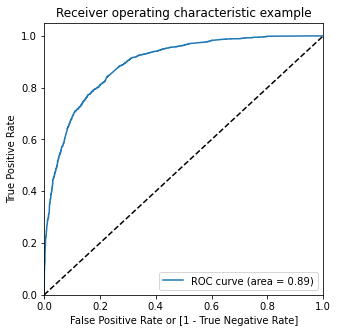

In [158]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The ROC curve bending toward the left side of the border, hence our model is having great accuracy.
The area under the curve is 87% of the total area.

In [159]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.066349,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.119767,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.612196,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.656967,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.914777,1,1,1,1,1,1,1,1,1,1,1,1


In [160]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.622264,0.983238,0.396159
0.2,0.2,0.765234,0.920687,0.667862
0.3,0.3,0.789954,0.878577,0.734443
0.4,0.4,0.813100,0.775552,0.836620
0.5,0.5,0.818296,0.710957,0.885531
0.6,0.6,0.811683,0.644726,0.916261
0.7,0.7,0.788222,0.534751,0.946991
0.8,0.8,0.762242,0.430908,0.969782
0.9,0.9,0.717840,0.286999,0.987708


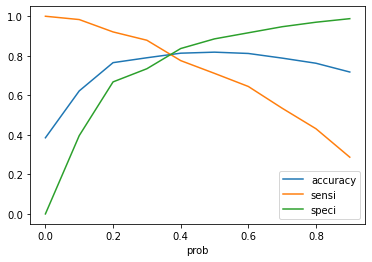

In [161]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [234]:
#Changing the cutoff to > 0.4 

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.39 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.066349,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.119767,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.612196,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.656967,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.914777,1,1,1,1,1,1,1,1,1,1,1,1


In [241]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3239,  666],
       [ 529, 1917]], dtype=int64)

In [242]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [243]:
# Checking the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8182963312864115

In [244]:
# Calculating the sensitivity

TP/(TP+FN)

0.7837285363859362

In [245]:
# Calculating the specificity

TN/(TN+FP)

0.829449423815621

## 11. Predicting the TEST data

In [ ]:
# Scaling numeric values

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [ ]:
# Substituting all the columns in the final train model

col = X_train.columns

In [247]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]

# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Not Provided,What is your current occupation_Not Provided,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,Do Not Email_Yes
3271,1.0,0.015936,0.070530,0,0,0,0,0,0,0,1,1,0,0,0,0
1490,1.0,0.019920,0.679695,1,0,0,0,0,0,0,0,0,1,0,0,0
7936,1.0,0.007968,0.033243,0,0,0,0,0,0,0,1,1,0,0,0,0
4216,1.0,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0
3830,1.0,0.031873,0.073675,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.011952,0.372417,1,0,0,0,1,0,0,0,1,0,0,0,0
2879,1.0,0.007968,0.264600,1,0,0,0,1,0,0,0,0,0,0,0,0
6501,1.0,0.031873,0.599730,1,0,0,0,0,0,1,0,0,0,0,0,0
7155,1.0,0.011952,0.231357,1,0,0,0,0,0,0,0,1,0,0,0,0


In [248]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.048540
1,1,0.965780
2,0,0.039545
3,1,0.874426
4,0,0.048021


In [200]:
# Making prediction using cut off 0.39

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.048540,0
1,1,0.965780,1
2,0,0.039545,0
3,1,0.874426,1
4,0,0.048021,0
...,...,...,...
2718,0,0.050930,0
2719,0,0.099867,0
2720,1,0.873367,1
2721,0,0.084669,0


In [202]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1449,  285],
       [ 216,  773]], dtype=int64)

In [203]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [227]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8189496878442893

In [204]:
# Calculating the sensitivity

TP/(TP+FN)

0.78159757330637

In [205]:
# Calculating the specificity

TN/(TN+FP)

0.8356401384083045

## 12. Calculating Precision & Recall

In [206]:
#Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3458,  447],
       [ 707, 1739]], dtype=int64)

In [207]:
# Precision = TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7955169258920403

In [208]:
#Recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7109566639411283

In [209]:
#Importing required library

from sklearn.metrics import precision_recall_curve

In [210]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [211]:
#Plotting Recall curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

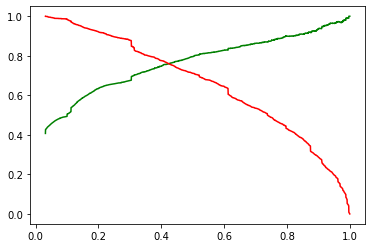

In [212]:
#Plotting Recall curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [213]:
#Taking cut-off 0.41
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.066349,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.119767,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.612196,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.656967,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.914777,1,1,1,1,1,1,1,1,1,1,1,1


In [214]:
# Calculating Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8159344985041725

### 12.1 Precision - Recall on Train data

In [215]:
# Creating confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3296,  609],
       [ 560, 1886]], dtype=int64)

In [216]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [217]:
# Precision = TP / TP + FP

TP / (TP + FP)

0.7559118236472946

In [218]:
#Recall = TP / TP + FN

TP / (TP + FN)

0.7710547833197057

In [219]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.048540
1,1,0.965780
2,0,0.039545
3,1,0.874426
4,0,0.048021


In [220]:
# Making prediction using cut off 0.41

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.048540,0
1,1,0.965780,1
2,0,0.039545,0
3,1,0.874426,1
4,0,0.048021,0
...,...,...,...
2718,0,0.050930,0
2719,0,0.099867,0
2720,1,0.873367,1
2721,0,0.084669,0


### 12.2 Precision - Recall on Test data

In [221]:
# Checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8189496878442893

In [222]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1472,  262],
       [ 231,  758]], dtype=int64)

In [223]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [224]:
# Precision = TP / TP + FP

TP / (TP + FP)

0.7431372549019608

In [225]:
#Recall = TP / TP + FN

TP / (TP + FN)

0.7664307381193124

## 13. RESULT

#### 13.1 TRAIN data score:

Accuracy: 0.818
    
Sensitivity: 0.783
    
Specificity: 0.829
    
Precision: 0.755
    
Recall: 0.771

#### 13.2 TEST data score:

Accuracy: 0.818

Sensitivity: 0.781

Specificity: 0.835

Precision: 0.743

Recall: 0.7664

## 14. CONCLUSION

 1. The values we have got for Accuracy, sensitivity and specificity are in acceptable range.
 
    
 2. The sensitivity score is inversely proportional to specificity .
 

 3. The ROC curve is bending toward the left side of the border, hence our model is having great accuracy.
 
    
 4. We have high recall score than precision score which we were exactly looking for.


 5. The variables which matters the most in terms of finding the genuine applicants are:
        The total time spend on the Website
        Total number of visits
        When their current occupation is as a working professional.
        Lead Source_Welingak Website
        